In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

### AARI Data 
#### http://www.aari.ru/main.php?lg=1

In [3]:
# Read dummy file
month=1
filename='data/%d.csv' %month
ds=pd.read_csv(filename,sep='\s+')
year  = ds['year'].values
years = np.arange(year[0],year[-1]+1,1)
nyears=(year[-1]-year[0]+1)

In [ ]:
# Initialize variables

# Monthly
ta_mm  = np.zeros((nyears,12)); ta_mm  [:,:] = np.nan
ta_10  = np.zeros((nyears,12)); ta_10  [:,:] = np.nan
ta_90  = np.zeros((nyears,12)); ta_90  [:,:] = np.nan
ts_mm  = np.zeros((nyears,12)); ts_mm  [:,:] = np.nan
ts_10  = np.zeros((nyears,12)); ts_10  [:,:] = np.nan
ts_90  = np.zeros((nyears,12)); ts_90  [:,:] = np.nan
slp_mm = np.zeros((nyears,12)); slp_mm [:,:] = np.nan
slp_10 = np.zeros((nyears,12)); slp_10 [:,:] = np.nan
slp_90 = np.zeros((nyears,12)); slp_90 [:,:] = np.nan

# Daily
ta_dd   = np.zeros((nyears,12,31)); ta_dd   [:,:,:] = np.nan
ta_min  = np.zeros((nyears,12,31)); ta_min  [:,:,:] = np.nan
ta_max  = np.zeros((nyears,12,31)); ta_max  [:,:,:] = np.nan
ts_dd   = np.zeros((nyears,12,31)); ts_dd   [:,:,:] = np.nan
ts_min  = np.zeros((nyears,12,31)); ts_min  [:,:,:] = np.nan
ts_max  = np.zeros((nyears,12,31)); ts_max  [:,:,:] = np.nan
slp_dd  = np.zeros((nyears,12,31)); slp_dd  [:,:,:] = np.nan
slp_min = np.zeros((nyears,12,31)); slp_min [:,:,:] = np.nan
slp_max = np.zeros((nyears,12,31)); slp_max [:,:,:] = np.nan

# Read monthly csv files
for month in np.arange(1,13):
    filename='data/%d.csv' %month
    ds=pd.read_csv(filename,sep='\s+')
    
    day   = ds['dd'].values
    year  = ds['year'].values
    years = np.arange(year[0],year[-1]+1,1)
    nyears=(year[-1]-year[0]+1)

    # Air Temperature
    tamin = ds['Tamin'].values; tamin[np.where(tamin==999.9)]=np.nan
    tamax = ds['Tamax'].values; tamax[np.where(tamax==999.9)]=np.nan
    tahh  = ds[ds.columns[4:12]].values; tahh[np.where(tahh==999.9)]=np.nan
    tadd  = np.nanmean(tahh,axis=1)

    # Soil Temperature
    tsmin = ds['Tsmin'].values; tsmin[np.where(tsmin==999.9)]=np.nan
    tsmax = ds['Tsmax'].values; tsmax[np.where(tsmax==999.9)]=np.nan
    tshh  = ds[ds.columns[22:30]].values; tshh[np.where(tshh==999.9)]=np.nan
    tsdd  = np.nanmean(tshh,axis=1)

    # SLP
    slphh  = ds[ds.columns[66:74]].values; slphh[np.where(slphh==9999.9)]=np.nan
    slpdd  = np.nanmean(slphh,axis=1)
    slpmin = np.nanmin(slphh,axis=1)
    slpmax = np.nanmax(slphh,axis=1)
    
    # Add to Mother Daily Variables
    y=year[0]
    d=0
    for t in range(len(year)):
        if year[t]==y:
            ta_dd  [y-year[0],month-1,d]  = tadd[t]
            ta_min [y-year[0],month-1,d]  = tamin[t]
            ta_max [y-year[0],month-1,d]  = tamax[t]
            ts_dd  [y-year[0],month-1,d]  = tsdd[t]
            ts_min [y-year[0],month-1,d]  = tsmin[t]
            ts_max [y-year[0],month-1,d]  = tsmax[t]
            slp_dd [y-year[0],month-1,d]  = slpdd[t]
            slp_min[y-year[0],month-1,d]  = slpmin[t]
            slp_max[y-year[0],month-1,d]  = slpmax[t]
            d=d+1
        else:
            y=y+1
            d=0
            ta_dd  [y-year[0],month-1,d]  = tadd[t]
            ta_min [y-year[0],month-1,d]  = tamin[t]
            ta_max [y-year[0],month-1,d]  = tamax[t]
            ts_dd  [y-year[0],month-1,d]  = tsdd[t]
            ts_min [y-year[0],month-1,d]  = tsmin[t]
            ts_max [y-year[0],month-1,d]  = tsmax[t]
            slp_dd [y-year[0],month-1,d]  = slpdd[t]
            slp_min[y-year[0],month-1,d]  = slpmin[t]
            slp_max[y-year[0],month-1,d]  = slpmax[t]
            d=d+1

    # Monthly means (of daily means, as in ERA)
    ta_monmean  = np.zeros((nyears))
    ts_monmean  = np.zeros((nyears))
    slp_monmean = np.zeros((nyears))
    for y in np.arange(year[0],year[-1]+1,1):
        ta_monmean[y-year[0]]  = np.mean(tadd[np.where(year==y)])
        ts_monmean[y-year[0]]  = np.mean(tsdd[np.where(year==y)])
        slp_monmean[y-year[0]] = np.mean(slpdd[np.where(year==y)])

    # Monthly percentiles (of 3-hourly measurements)
    tahh_yy  = np.zeros((nyears,31*8)); tahh_yy[:,:]  = np.nan
    tshh_yy  = np.zeros((nyears,31*8)); tshh_yy[:,:]  = np.nan
    slphh_yy = np.zeros((nyears,31*8)); slphh_yy[:,:] = np.nan
    y=year[0]
    d=0
    for t in range(len(year)):
        if y==year[t]:
            tahh_yy[y-year[0],d:d+8]  = tahh[t]
            tshh_yy[y-year[0],d:d+8]  = tshh[t]
            slphh_yy[y-year[0],d:d+8] = slphh[t]
            d=d+8
        else:
            y=y+1
            d=0
            tahh_yy[y-year[0],d:d+8]  = tahh[t]
            tshh_yy[y-year[0],d:d+8]  = tshh[t]
            slphh_yy[y-year[0],d:d+8] = slphh[t]
            d=d+8
    for y in range(nyears):
        tahh_yy[y,:].sort()
        tshh_yy[y,:].sort()
        slphh_yy[y,:].sort()
    # Now we take the highest and lowest 10% observations, 
    # among the available number monthly observations.
    tayy_nobs  = np.zeros((nyears))
    tsyy_nobs  = np.zeros((nyears))
    slpyy_nobs = np.zeros((nyears))
    tayy_90  = np.zeros((nyears))
    tsyy_90  = np.zeros((nyears))
    slpyy_90 = np.zeros((nyears))
    tayy_10  = np.zeros((nyears))
    tsyy_10  = np.zeros((nyears))
    slpyy_10 = np.zeros((nyears))
    for y in range(nyears):
        # Number of observations (non-nan values)
        tayy_nobs[y]  = np.sum(~np.isnan(tahh_yy[y,:]))
        tsyy_nobs[y]  = np.sum(~np.isnan(tshh_yy[y,:]))
        slpyy_nobs[y] = np.sum(~np.isnan(slphh_yy[y,:]))
        # 90th pctl
        tahh_yy[y,:]  = sorted(tahh_yy[y,:],reverse=True)
        tshh_yy[y,:]  = sorted(tshh_yy[y,:],reverse=True)
        slphh_yy[y,:] = sorted(slphh_yy[y,:],reverse=True)
        tayy_90[y]    = np.mean(tahh_yy[y,0:int(round(tayy_nobs[y]/10))])
        tsyy_90[y]    = np.mean(tshh_yy[y,0:int(round(tsyy_nobs[y]/10))])
        slpyy_90[y]   = np.mean(slphh_yy[y,0:int(round(slpyy_nobs[y]/10))])
        # 10th pctl
        tahh_yy[y,:]  = sorted(tahh_yy[y,:],reverse=False)
        tshh_yy[y,:]  = sorted(tshh_yy[y,:],reverse=False)
        slphh_yy[y,:] = sorted(slphh_yy[y,:],reverse=False)
        tayy_10[y]    = np.mean(tahh_yy[y,0:int(round(tayy_nobs[y]/10))])
        tsyy_10[y]    = np.mean(tshh_yy[y,0:int(round(tsyy_nobs[y]/10))])
        slpyy_10[y]   = np.mean(slphh_yy[y,0:int(round(slpyy_nobs[y]/10))])
        
    # Add to Monthly Mother variables
    ta_mm[:,month-1]  = ta_monmean
    ts_mm[:,month-1]  = ts_monmean
    slp_mm[:,month-1] = slp_monmean
    ta_10[:,month-1]  = tayy_10
    ts_10[:,month-1]  = tsyy_10
    slp_10[:,month-1] = slpyy_10
    ta_90[:,month-1]  = tayy_90
    ts_90[:,month-1]  = tsyy_90
    slp_90[:,month-1] = slpyy_90

    # Plot Summary
    f=plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('Month: %d - Tiksi Station (WMO 21824)' %month, loc='left')
    plt.plot(years,ta_monmean,'r', label='ta mean')
    plt.plot(years,tayy_90,'--r', label='ta 90th and 10th pctl')
    plt.plot(years,tayy_10,'--r')
    plt.plot(years,ts_monmean,'g', label='ts mean')
    plt.plot(years,tsyy_90,'--g', label='ts 90th and 10th pctl')
    plt.plot(years,tsyy_10,'--g')
    if month>5 and month<10:
        plt.legend(loc='lower left',fontsize='medium',frameon=False, ncol=2)
    else:
        plt.legend(loc='upper left',fontsize='medium',frameon=False, ncol=2)
    plt.xlim((1950,2020)); plt.ylim((-48,25)); plt.ylabel('°C')
    plt.subplot(132)
    plt.plot(years,slp_monmean,'b', label='slp')
    plt.plot(years,slpyy_90,'--b', label='ts 90th and 10th pctl')
    plt.plot(years,slpyy_10,'--b')
    plt.legend(loc='upper left',fontsize='medium',frameon=False, ncol=2)
    plt.xlim((1950,2020)); plt.ylim((985,1055)); plt.ylabel('hPa')
    plt.subplot(133)
    plt.plot(years,tayy_nobs,'r',label='ta')
    plt.plot(years,tsyy_nobs,'g',label='ts')
    plt.plot(years,slpyy_nobs,'b',label='slp')
    plt.ylabel('Number of monthly observations')
    plt.legend(loc='upper left',frameon=False)
    f.savefig('figs/tiksi_summary_%d.png' %month, dpi=300)
    plt.show()
  

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

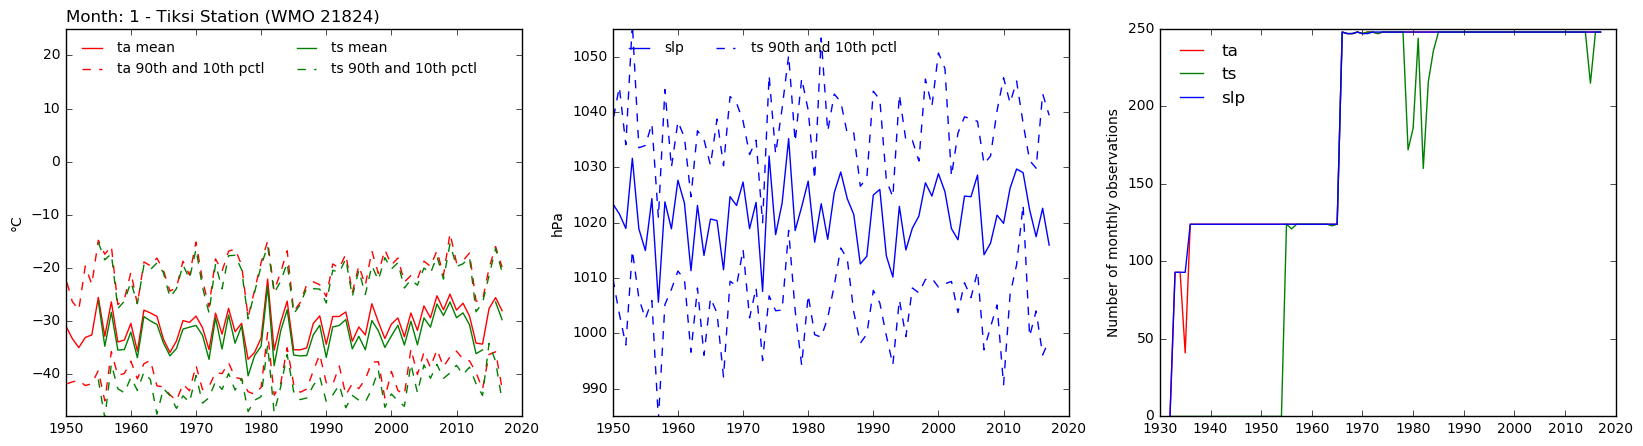

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

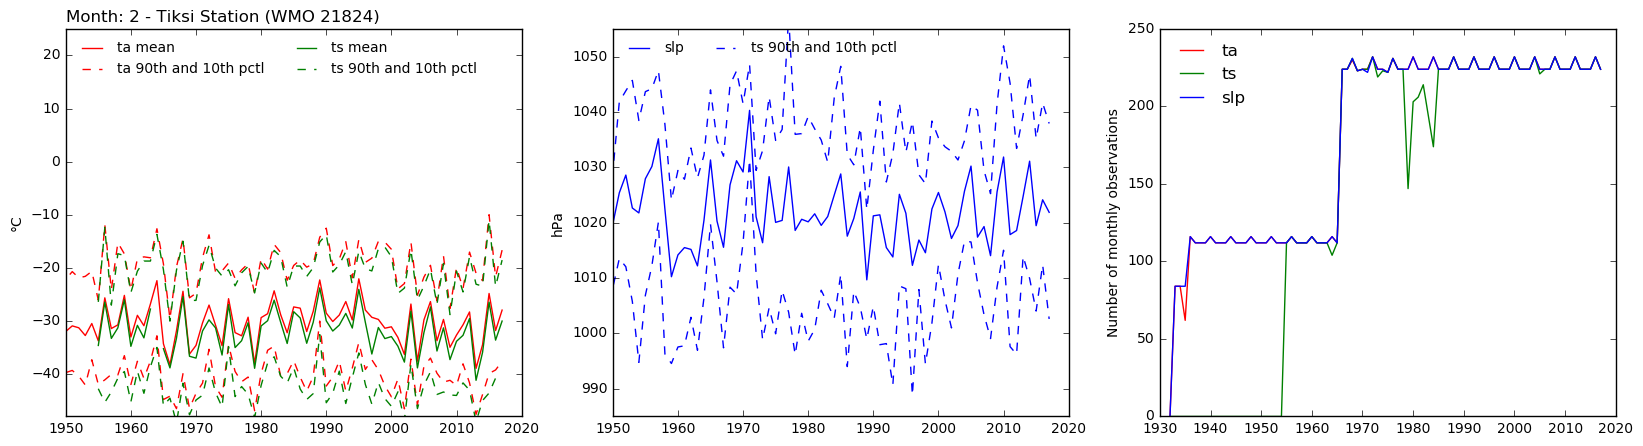

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

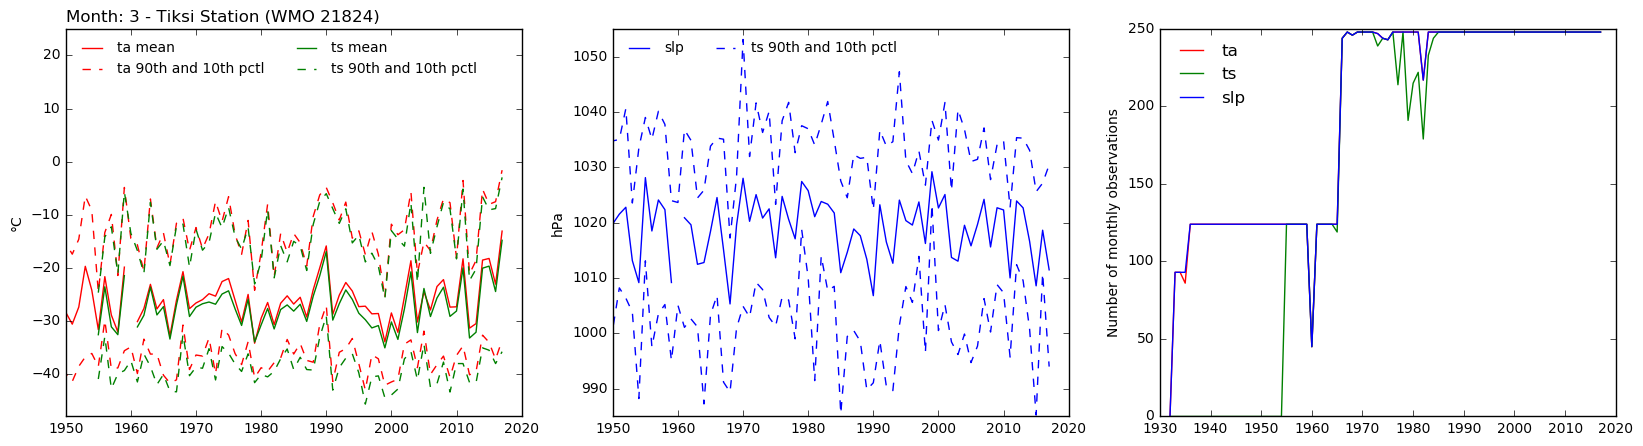

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

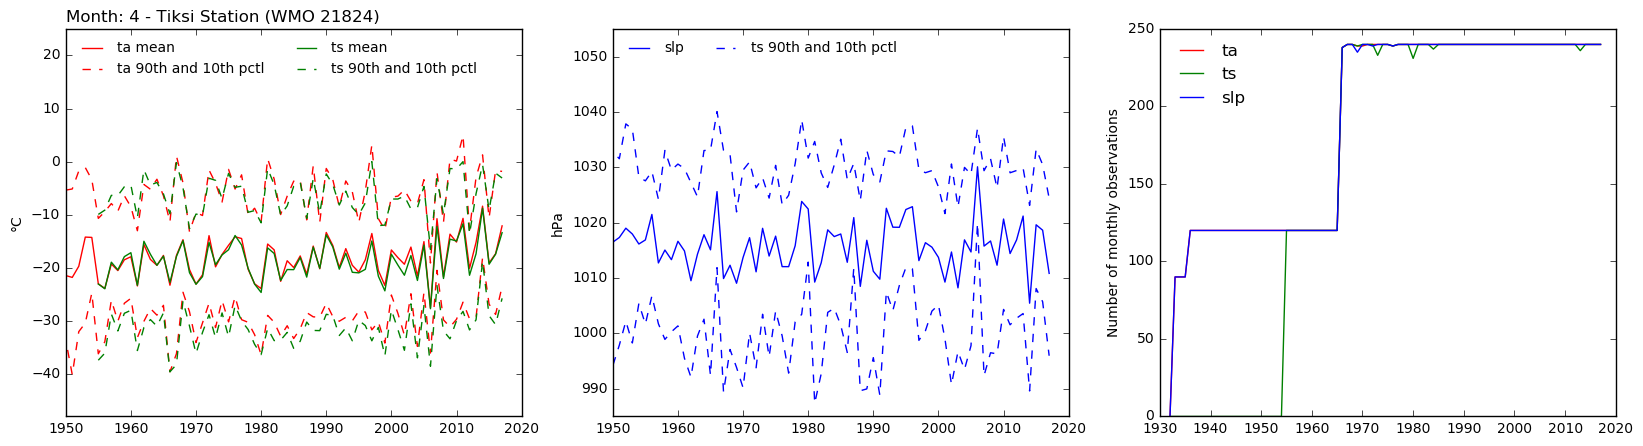

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

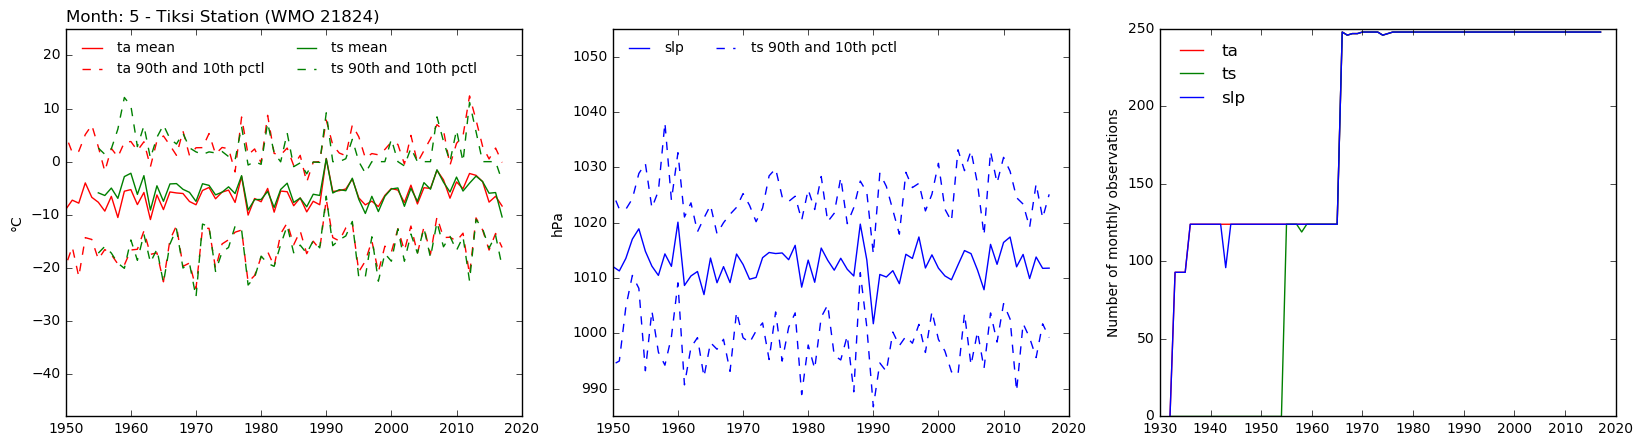

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

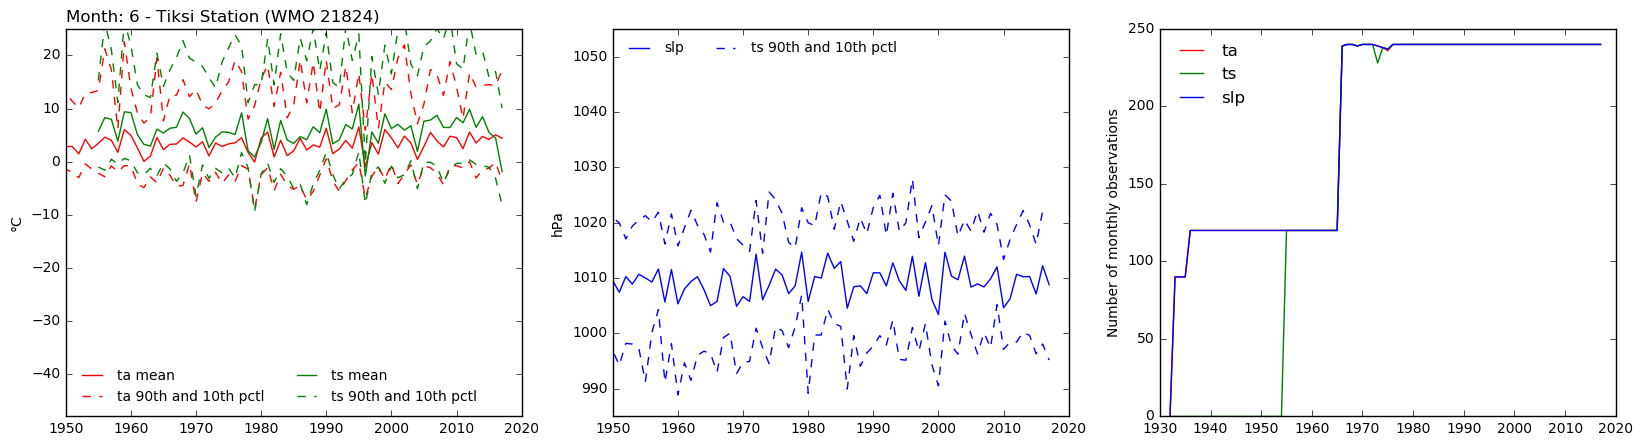

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

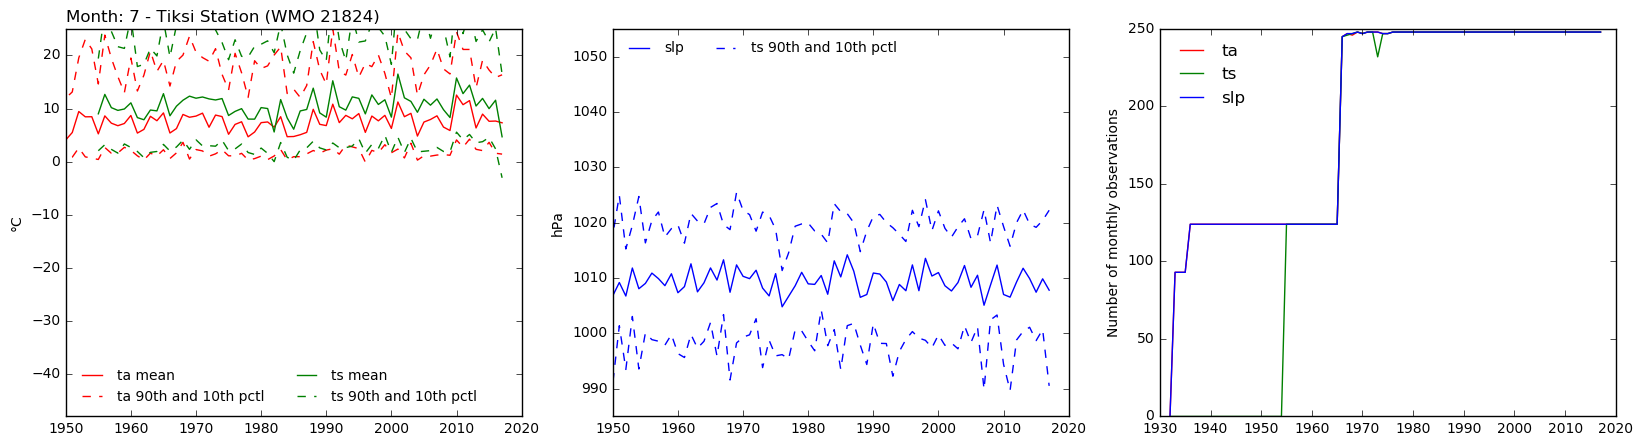

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5

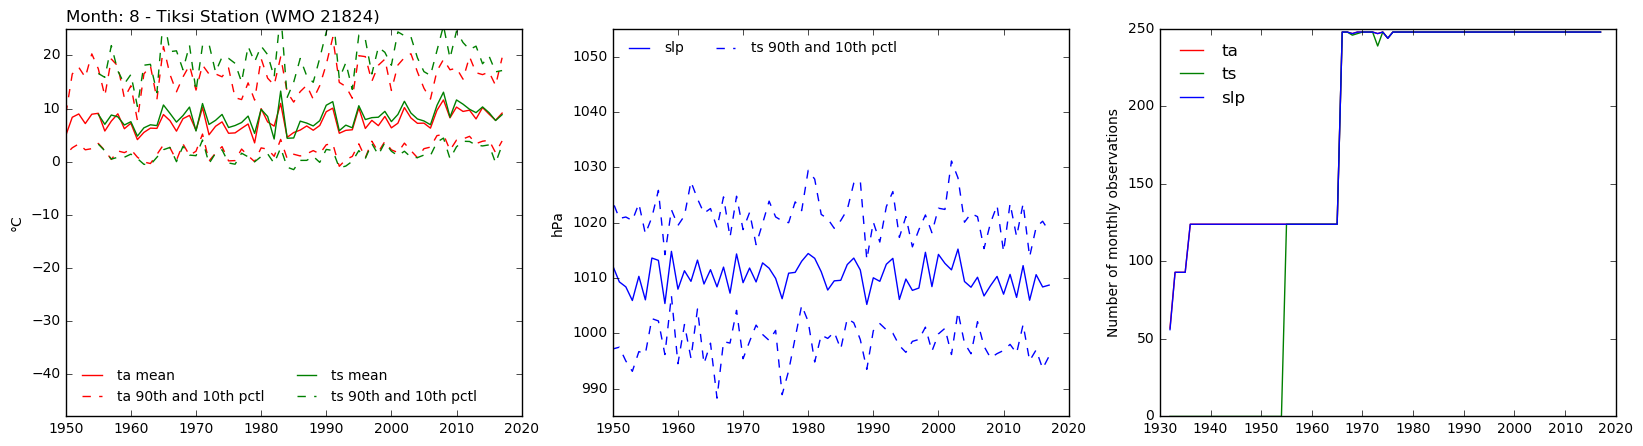

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


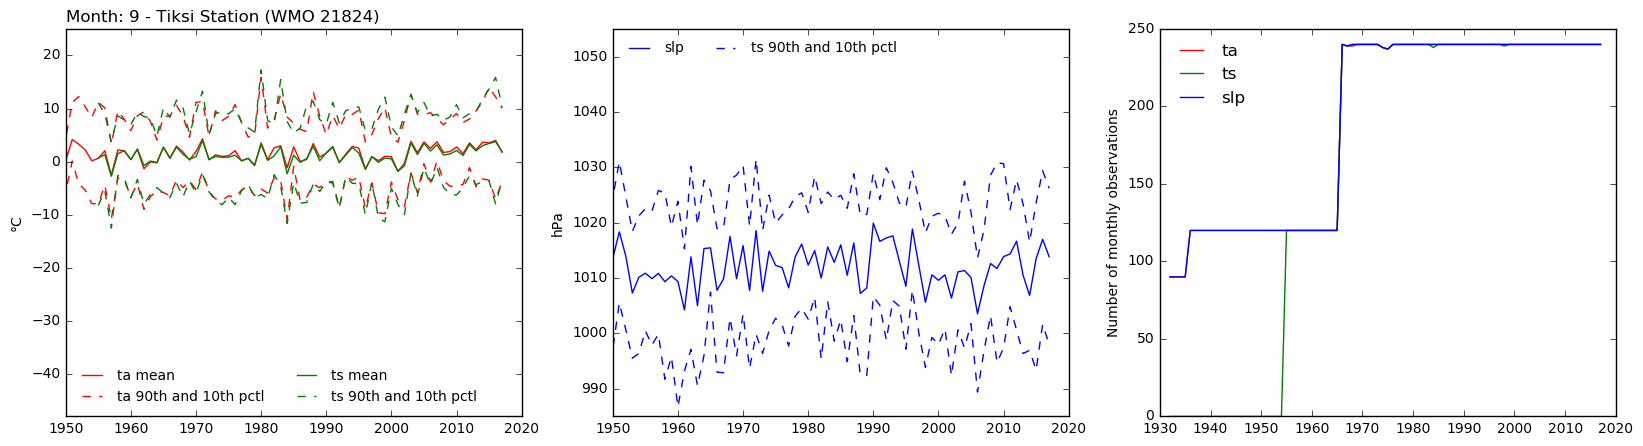

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


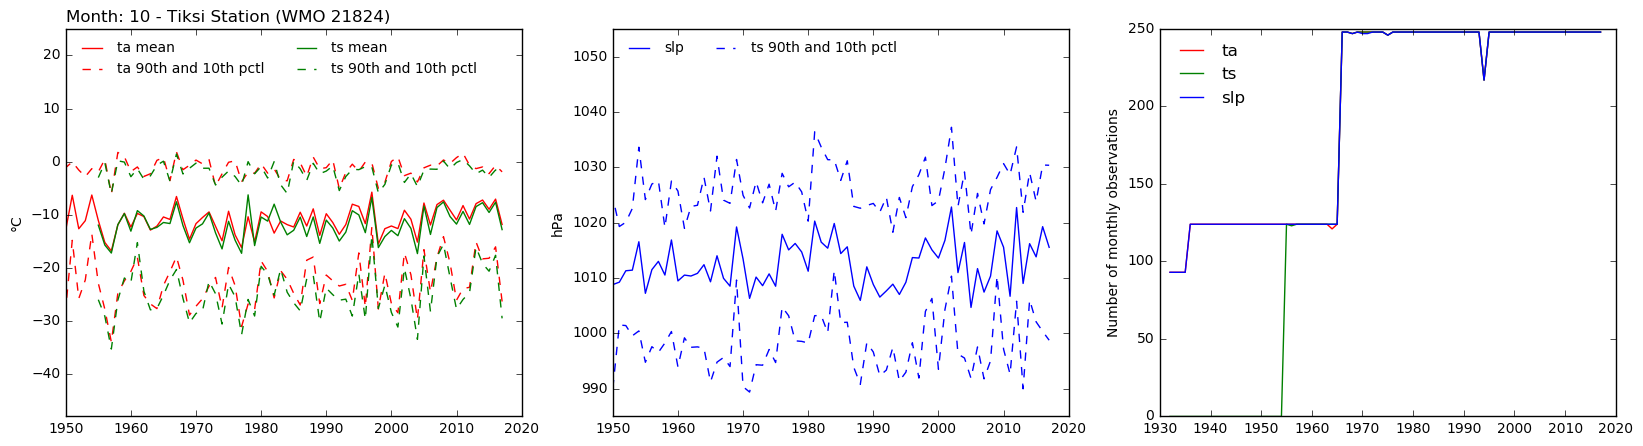

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


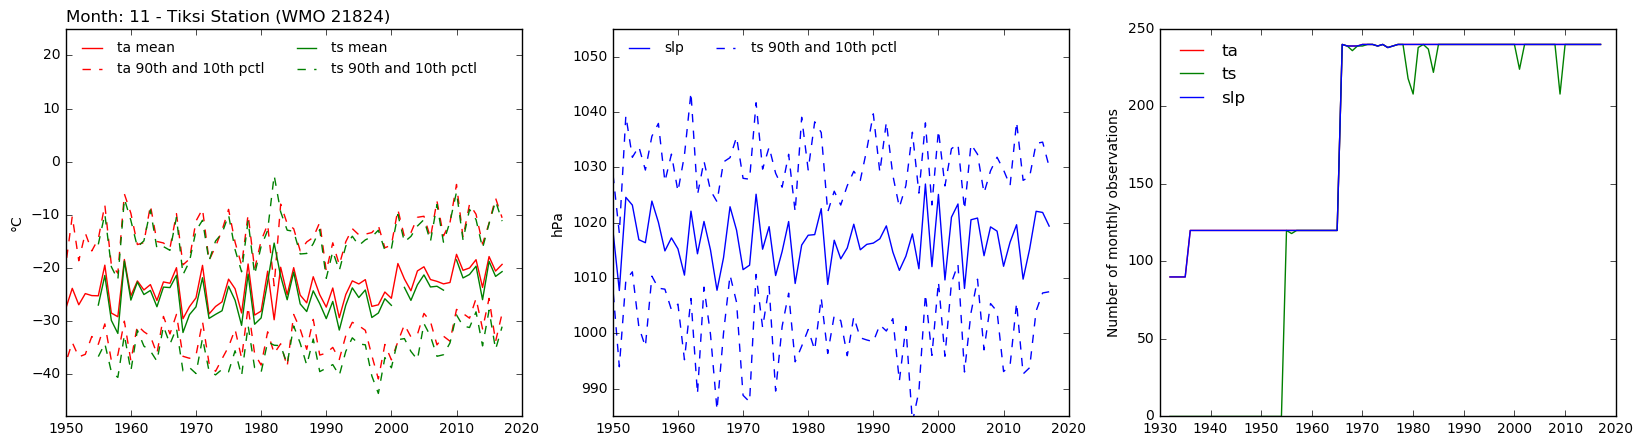

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/numpy-1.11.2-py3.5-linux-x86_64.egg/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


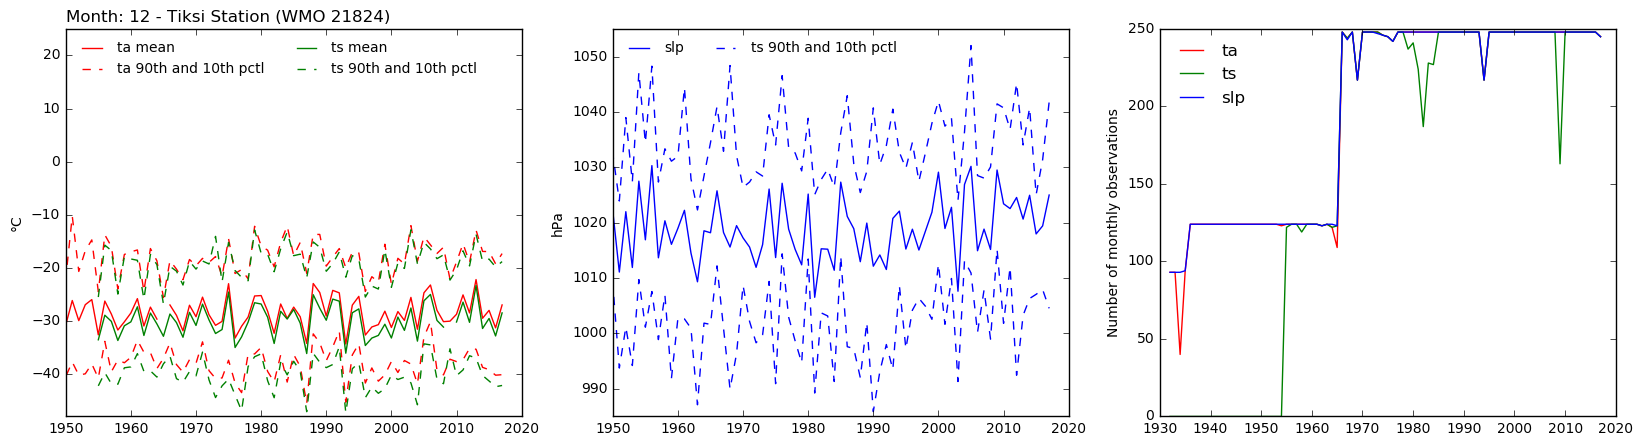

In [23]:
# Save Monthly variables
newds = xr.Dataset(data_vars={'year' : ("year", years),
                              'month': ("month", np.arange(1,13)),
                              'ta'   : (["year","month"], ta_mm),
                              'ta10' : (["year","month"], ta_10),
                              'ta90' : (["year","month"], ta_90),
                              'ts'   : (["year","month"], ts_mm),
                              'ts10' : (["year","month"], ts_10),
                              'ts90' : (["year","month"], ts_90),
                              'slp'  : (["year","month"], slp_mm),
                              'slp10': (["year","month"], slp_10),
                              'slp90': (["year","month"], slp_90),
                             })
newds.attrs = {'Description': 'Monthly values from Tiksi Station, data from: http://www.aari.ru/main.php?lg=1'}
newds['year'].attrs  = {'standard_name':'year' ,'long_name':'year' ,'units': 'year' ,'axis': 'T'}
newds['month'].attrs = {'standard_name':'month','long_name':'month','units': 'month','axis': 'L'}
newds['ta'].attrs    = {'standard_name':'ta'   ,'long_name': 'air mean temp.',      'units': 'degree-C'}
newds['ta10'].attrs  = {'standard_name':'ta10' ,'long_name': 'air temp. 10th pctl', 'units': 'degree-C'}
newds['ta90'].attrs  = {'standard_name':'ta90' ,'long_name': 'air temp. 90th pctl', 'units': 'degree-C'}
newds['ts'].attrs    = {'standard_name':'ts'   ,'long_name': 'soil mean temp.',     'units': 'degree-C'}
newds['ts10'].attrs  = {'standard_name':'ts10' ,'long_name': 'soil temp. 10th pctl','units': 'degree-C'}
newds['ts90'].attrs  = {'standard_name':'ts90' ,'long_name': 'soil temp. 90th pctl','units': 'degree-C'}
newds['slp'].attrs   = {'standard_name':'slp'  ,'long_name': 'mean sea level pressure',  'units': 'hPa'}
newds['slp10'].attrs = {'standard_name':'slp10','long_name': 'mean slp 10th pctl','units': 'hPa'}
newds['slp90'].attrs = {'standard_name':'slp90','long_name': 'mean slp 90th pctl','units': 'hPa'}
newds.to_netcdf('tiksi_monthly.nc')

# Save Daily variables
newds = xr.Dataset(data_vars={'year' : ("year", years),
                              'month': ("month", np.arange(1,13)),
                              'day'  : ("day", np.arange(1,32)),
                              'ta'     : (["year","month","day"], ta_dd),
                              'tamin'  : (["year","month","day"], ta_min),
                              'tamax'  : (["year","month","day"], ta_max),
                              'ts'     : (["year","month","day"], ts_dd),
                              'tsmin'  : (["year","month","day"], ts_min),
                              'tsmax'  : (["year","month","day"], ts_max),
                              'slp'    : (["year","month","day"], slp_dd),
                              'slpmin' : (["year","month","day"], slp_min),
                              'slpmax' : (["year","month","day"], slp_max),
                             })
newds.attrs = {'Description': 'Daily values from Tiksi Station, data from: http://www.aari.ru/main.php?lg=1'}
newds['year'].attrs   = {'standard_name':'year'  ,'long_name':'year' ,'units': 'year' ,'axis': 'T'}
newds['month'].attrs  = {'standard_name':'month' ,'long_name':'month','units': 'month','axis': 'X'}
newds['day'].attrs    = {'standard_name':'day'   ,'long_name':'day'  ,'units': 'day'  ,'axis': 'Y'}
newds['ta'].attrs     = {'standard_name':'ta'    ,'long_name': 'air mean temp.'    , 'units': 'degree-C'}
newds['tamin'].attrs  = {'standard_name':'tamin' ,'long_name': 'air min. temp.'    , 'units': 'degree-C'}
newds['tamax'].attrs  = {'standard_name':'tamax' ,'long_name': 'air max. temp.'    , 'units': 'degree-C'}
newds['ts'].attrs     = {'standard_name':'ts'    ,'long_name': 'soil mean temp.'   , 'units': 'degree-C'}
newds['tsmin'].attrs  = {'standard_name':'tsmin' ,'long_name': 'soil min. temp.'   , 'units': 'degree-C'}
newds['tsmax'].attrs  = {'standard_name':'tsmax' ,'long_name': 'soil max. temp.'   , 'units': 'degree-C'}
newds['slp'].attrs    = {'standard_name':'slp'   ,'long_name': 'sea level pressure', 'units': 'hPa'}
newds['slpmin'].attrs = {'standard_name':'slpmin','long_name': 'min slp of the day', 'units': 'hPa'}
newds['slpmax'].attrs = {'standard_name':'slpmax','long_name': 'max slp of the day', 'units': 'hPa'}
newds.to_netcdf('tiksi_daily.nc')